# 🧪 Preparcial – Caso de Negocio “YumFit”
## Escenario
Eres el/la **Chief Marketing Officer (CMO)** de **YumFit**, una start-up que vende snacks saludables 100 % online.  
Tu equipo de Data te entrega un dataset con historial de 150 clientes (`df`) y te aprueban un presupuesto de **US$10 000** para la próxima campaña de retención y cross-selling.

### Misión
Sigue el **paso a paso** y toma decisiones que evolucionan de lo descriptivo a la recomendación táctica:
1. Conocer la base de clientes → *EDA*  
2. Calcular **CAC** y **LTV** → *Métricas de negocio*  
3. Segmentar en **4 clusters** con *K-Means* → *Inteligencia de clientes*  
4. Evaluar el valor de cada cluster → *Trade-offs*  
5. Hacer **profiling** (nombre + storytelling) → *Comunicación*  
6. Asignar presupuesto y justificar → *Decisión ejecutiva*

---
### Instrucciones
Ejecuta cada celda, responde las preguntas (P1…P12) y prepara un informe ejecutivo breve al final.

In [41]:
!wget "https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos (1).csv"

--2025-04-30 19:33:49--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv [following]
--2025-04-30 19:33:50--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 738615 (721K) [text/plain]
Saving to: ‘clientes_segmentos (1).csv.1’

clientes_segmento

In [42]:
import pandas as pd
df = pd.read_csv('clientes_segmentos (1).csv')

In [43]:
df.head

<bound method NDFrame.head of       id_cliente  edad genero  ingresos plataforma  interacciones  compras  \
0         C00000    24      M     29869  Instagram             35        2   
1         C00001    38      M     77827  Instagram             36        1   
2         C00002    39      M     18000  Instagram             25        2   
3         C00003    20      F     42914  Instagram             29        4   
4         C00004    38      M     30536  Instagram             33        3   
...          ...   ...    ...       ...        ...            ...      ...   
14995     C14995    30      F     48461   Facebook             17        2   
14996     C14996    24      F     18000  Instagram             27        1   
14997     C14997    28      F     33326     TikTok             39        5   
14998     C14998    28      M     19801  Instagram             34        1   
14999     C14999    46      M     60522   Facebook             16        5   

       total_gastado fecha_ultima_compra  costo_adquisicion  
0                 74          2024-12-25                 20  
1                 35          2025-01-24                 10  
2                116          2025-01-18                 16  
3                112          2025-03-14                 11  
4                147          2025-01-01                 23  
...              ...                 ...                ...  
14995            102          2024-12-04                 23  
14996             44          2025-02-06                 11  
14997             75          2024-11-24                  8  
14998             39          2025-01-15                 22  
14999            465          2025-01-05                 31  

[15000 rows x 10 columns]>

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id_cliente           15000 non-null  object
 1   edad                 15000 non-null  int64 
 2   genero               15000 non-null  object
 3   ingresos             15000 non-null  int64 
 4   plataforma           15000 non-null  object
 5   interacciones        15000 non-null  int64 
 6   compras              15000 non-null  int64 
 7   total_gastado        15000 non-null  int64 
 8   fecha_ultima_compra  15000 non-null  object
 9   costo_adquisicion    15000 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 1.1+ MB


In [45]:
df.describe()

,edad,ingresos,interacciones,compras,total_gastado,costo_adquisicion
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,33.101800,44159.980000,27.138000,2.327133,115.132133,18.931267
std,11.393441,18777.072872,11.093263,1.216093,96.266731,7.111159
min,16.000000,18000.000000,3.000000,1.000000,10.000000,5.000000
25%,24.000000,29097.000000,17.000000,1.000000,48.000000,14.000000
50%,31.000000,42788.000000,28.000000,2.000000,87.000000,18.000000
75%,40.000000,56946.000000,35.000000,3.000000,154.000000,24.000000
max,60.000000,125002.000000,64.000000,6.000000,702.000000,35.000000


### P1. ¿Cuántos clientes hay y cómo se distribuyen por plataforma?


In [46]:
# prompt: P1. ¿Cuántos clientes hay y cómo se distribuyen por plataforma?

# Calculate the total number of clients
total_clients = len(df)

# Calculate the distribution of clients by platform
# Check if 'Plataforma' is in the columns, case-sensitively
if 'Plataforma' in df.columns:
    platform_distribution = df['Plataforma'].value_counts()
else:
    # If not found, check for case-insensitive match
    plataforma_col = next((col for col in df.columns if col.lower() == 'plataforma'), None)
    if plataforma_col:
        platform_distribution = df[plataforma_col].value_counts()
        print(f"Warning: Column name is '{plataforma_col}', not 'Plataforma'")
    else:
        raise KeyError("Column 'Plataforma' or a similar name not found in the DataFrame")

print(f"Total number of clients: {total_clients}")
print("\nDistribution of clients by platform:")
platform_distribution

Total number of clients: 15000

Distribution of clients by platform:


,count
plataforma,
Instagram,5972
Facebook,5288
TikTok,3740


### P2. ¿Cómo es la distribución de la edad? ¿Hay outliers?


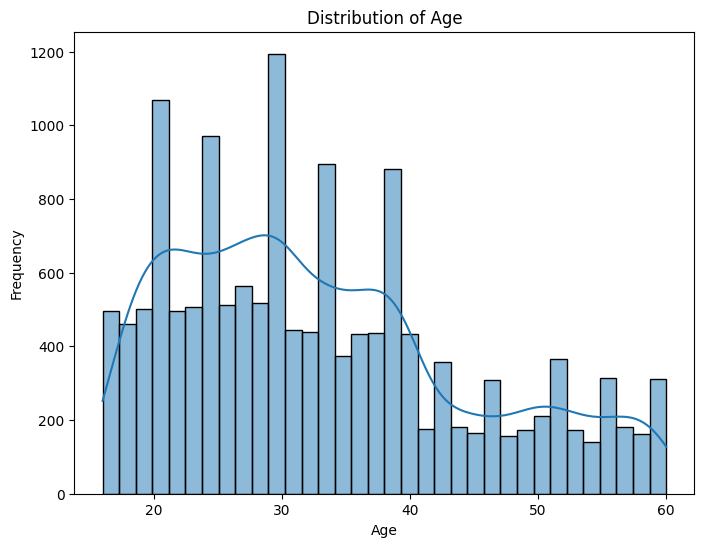

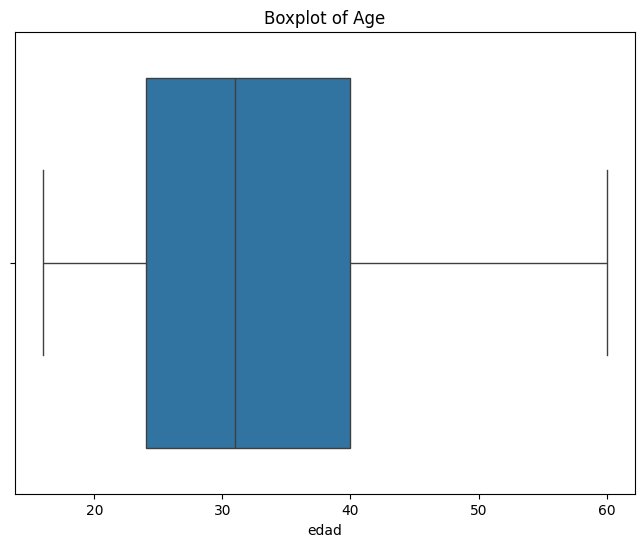

count    15000.000000
mean        33.101800
std         11.393441
min         16.000000
25%         24.000000
50%         31.000000
75%         40.000000
max         60.000000
Name: edad, dtype: float64

Outliers (using IQR):


,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,total_gastado,fecha_ultima_compra,costo_adquisicion


In [47]:
# prompt:  ¿Cómo es la distribución de la edad? ¿Hay outliers?

import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the distribution of age
# Check if 'Edad' is in the columns, case-sensitively
if 'Edad' in df.columns:
    age_column = 'Edad'
else:
    # If not found, check for case-insensitive match
    edad_col = next((col for col in df.columns if col.lower() == 'edad'), None)
    if edad_col:
        age_column = edad_col
        print(f"Warning: Column name is '{edad_col}', not 'Edad'")
    else:
        raise KeyError("Column 'Edad' or a similar name not found in the DataFrame")

plt.figure(figsize=(8, 6))
sns.histplot(df[age_column], kde=True) # Use the corrected or found column name
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Identify outliers using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[age_column]) # Use the corrected or found column name
plt.title('Boxplot of Age')
plt.show()

# Calculate descriptive statistics for age
age_stats = df[age_column].describe() # Use the corrected or found column name
print(age_stats)

# Optional: Identify outliers using IQR method
Q1 = df[age_column].quantile(0.25) # Use the corrected or found column name
Q3 = df[age_column].quantile(0.75) # Use the corrected or found column name
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[age_column] < lower_bound) | (df[age_column] > upper_bound)] # Use the corrected or found column name
print("\nOutliers (using IQR):")
outliers


### P3. ¿Existe correlación entre ingresos y total_gastado?


Correlation between Ingresos and total_gastado: 0.2554721233489521


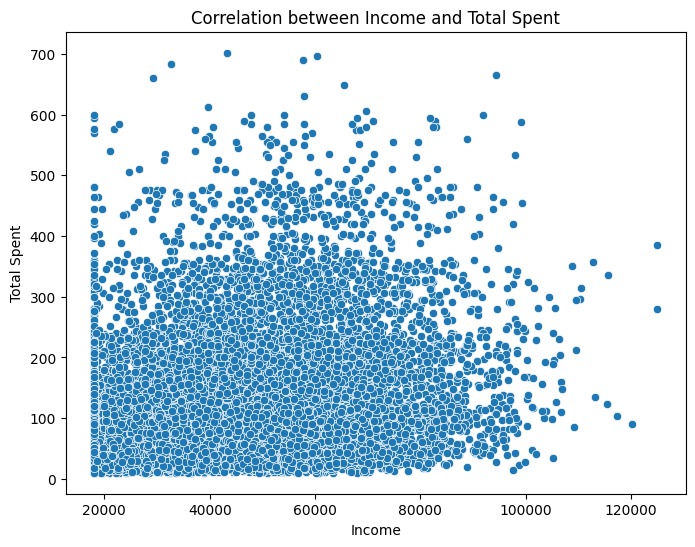

In [48]:
# prompt: Existe correlación entre ingresos y total_gastado?

# Calculate the correlation between 'Ingresos' and 'total_gastado'
# Check if 'Ingresos' is in the columns, case-sensitively
if 'Ingresos' in df.columns:
    ingresos_column = 'Ingresos'
else:
    # If not found, check for case-insensitive match
    ingresos_col = next((col for col in df.columns if col.lower() == 'ingresos'), None)
    if ingresos_col:
        ingresos_column = ingresos_col
        print(f"Warning: Column name is '{ingresos_col}', not 'Ingresos'")
    else:
        raise KeyError("Column 'Ingresos' or a similar name not found in the DataFrame")

# Use the corrected or found column name for correlation calculation
correlation = df[ingresos_column].corr(df['total_gastado'])

print(f"Correlation between Ingresos and total_gastado: {correlation}")

# Visualize the correlation using a scatter plot
plt.figure(figsize=(8, 6))
# Use the corrected or found column name for scatter plot
sns.scatterplot(x=ingresos_column, y='total_gastado', data=df)
plt.title('Correlation between Income and Total Spent')
plt.xlabel('Income')
plt.ylabel('Total Spent')
plt.show()



#### 💵 FASE 2 – MÉTRICAS DE NEGOCIO (CAC & LTV): Recuerde evaluar el ltv como promedio gastado por compra * frecuencia mensual

In [49]:
from datetime import datetime

df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])
df['dias_desde_ultima'] = (pd.Timestamp('2025-04-01') - df['fecha_ultima_compra']).dt.days
df['frecuencia_mensual'] = df['compras'] / (df['dias_desde_ultima']/30 + 1)


In [50]:
df['LTV'] = (df['total_gastado'] / df['compras'] )* df['frecuencia_mensual']

In [51]:
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,total_gastado,fecha_ultima_compra,costo_adquisicion,dias_desde_ultima,frecuencia_mensual,LTV
0,C00000,24,M,29869,Instagram,35,2,74,2024-12-25,20,97,0.472441,17.480315
1,C00001,38,M,77827,Instagram,36,1,35,2025-01-24,10,67,0.309278,10.824742
2,C00002,39,M,18000,Instagram,25,2,116,2025-01-18,16,73,0.582524,33.786408
3,C00003,20,F,42914,Instagram,29,4,112,2025-03-14,11,18,2.500000,70.000000
4,C00004,38,M,30536,Instagram,33,3,147,2025-01-01,23,90,0.750000,36.750000


SOLO HAY QUE CALCULAR EL ATOM VALUe ltv

### P4. CAC vs LTV por plataforma

In [52]:
ltv_cac_by_platform = df.groupby('plataforma')[['LTV', 'costo_adquisicion']].mean()

print(ltv_cac_by_platform)


                  LTV  costo_adquisicion
plataforma                              
Facebook    55.092580          25.039334
Instagram   26.037869          17.488948
TikTok      16.686795          12.598128


#### 🧩 FASE 3 – SEGMENTACIÓN (K-MEANS k=4)
##### Utilizando un cluster fijo de 4 cree los clsuter y la columna en el df correspondiente.

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['ingresos', 'edad', 'total_gastado']])

In [54]:
from sklearn.cluster import KMeans

In [55]:
clusterfijo = 4
kmeans = KMeans(n_clusters=clusterfijo, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

### P5. Visualiza clusters

In [56]:
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,total_gastado,fecha_ultima_compra,costo_adquisicion,dias_desde_ultima,frecuencia_mensual,LTV,Cluster
0,C00000,24,M,29869,Instagram,35,2,74,2024-12-25,20,97,0.472441,17.480315,2
1,C00001,38,M,77827,Instagram,36,1,35,2025-01-24,10,67,0.309278,10.824742,0
2,C00002,39,M,18000,Instagram,25,2,116,2025-01-18,16,73,0.582524,33.786408,2
3,C00003,20,F,42914,Instagram,29,4,112,2025-03-14,11,18,2.500000,70.000000,2
4,C00004,38,M,30536,Instagram,33,3,147,2025-01-01,23,90,0.750000,36.750000,2


#### CREA LA COLUMNA gananancia resultante entre el ltv- CAC

In [57]:
df['ganancia'] = df['LTV'] - df['costo_adquisicion']

### P6. Ganancia promedio por cluster

In [58]:
promedio_gastado_col = df.groupby('Cluster')[['ganancia']].mean()
print(promedio_gastado_col)

          ganancia
Cluster           
0         6.329619
1        16.469823
2         6.503596
3        71.830774


### P7. Género por cluster


In [59]:
genero_cluster = df.groupby('Cluster')[['genero']].value_counts(normalize=True) * 100
print(genero_cluster)

Cluster  genero
0        F         50.219473
         M         49.780527
1        M         52.507020
         F         47.492980
2        F         50.414762
         M         49.585238
3        F         50.188917
         M         49.811083
Name: proportion, dtype: float64


### P8. Plataforma por cluster


In [60]:
plataforma_col = df.groupby('Cluster')[['plataforma']].value_counts()
print(plataforma_col)

Cluster  plataforma
0        Instagram     2797
         TikTok        1147
         Facebook      1068
1        Facebook      2348
         Instagram      145
2        Instagram     2906
         TikTok        2592
         Facebook       409
3        Facebook      1463
         Instagram      124
         TikTok           1
Name: count, dtype: int64


### 📝 FASE 5 – PROFILING & NAMING

#### P9. Asigna un nombre a cada cluster y describe en 2-3 líneas su perfil.


In [62]:
cluster_names = {
    0: "Adultos con Ingresos Altos, Gastos Bajos",
    1: "Mayores con Ingresos Altos, Gastos Medios",
    2: "Jovenes con Ingresos Bajos, Gastos Bajos",
    3: "Adultos con Ingresos Altos, Gastos Altos"
}

### 💡 FASE 6 – DECISIÓN DE PRESUPUESTO

#### P10. Con 10 000 USD elige 2 clusters y asigna presupuesto.
#### P11. ¿Qué cluster fidelizarías con bajo costo?
#### P12. Enumera 2 riesgos o limitaciones del análisis.

In [63]:
df['ratio']= df['LTV'] / df['costo_adquisicion']

In [65]:
ratio_cluster = df.groupby('Cluster')[['ratio']].mean()
print(ratio_cluster)

            ratio
Cluster          
0        1.495864
1        1.778187
2        1.553069
3        4.181791


Riesgo 1: Sobreajuste del Modelo de Segmentación (K-Means)
K-Means puede ser sensible a la selección del número de clusters (k) y a la inicialización aleatoria. Si el modelo se sobreajusta a los datos de entrenamiento, es posible que no generalice bien a nuevos clientes o que no refleje la verdadera estructura de la base de clientes. Esto podría llevar a decisiones de marketing ineficientes.
Riesgo 2: Falta de Variables Externas y Comportamientos Dinámicos

El análisis se basa principalmente en características demográficas y de gasto de los clientes. No considera otros factores importantes como la competencia, las tendencias del mercado, la estacionalidad, o los cambios en los comportamientos de compra a lo largo del tiempo. Esto limita la precisión de las predicciones y la capacidad de adaptación de las estrategias de marketing.

### ENTREGA FINAL
#### Resumen ejecutivo (máx 1 página) con:
##### – Nombres y descripciones de los 4 clusters
##### – Tabla LTV, CAC, Ganancia, tamaño
##### – Plan de inversión y justificación
#### Comentarios sobre cómo mejorarías el dataset o la metodología

El objetivo de esta propuesta es maximizar el rendimiento de una inversión de US$10,000 en una campaña de retención y ventas cruzadas, segmentando estratégicamente la base de clientes de YumFit. Para ello, se aplicó la técnica de K-Means Clustering, utilizando variables como edad, ingresos y gasto total, lo que permitió agrupar a los clientes en cuatro segmentos distintos.

Los resultados del análisis revelan perfiles bien definidos. El Cluster 3 agrupa a adultos con altos ingresos y elevado gasto, siendo los clientes más valiosos y comprometidos con la marca; este grupo es ideal para programas de fidelización exclusivos. El Cluster 1 incluye a personas mayores con ingresos altos y gasto medio, con un fuerte potencial para estrategias de cross-selling hacia productos premium. El Cluster 0 está compuesto por adultos con ingresos elevados pero bajo nivel de gasto, quienes podrían responder positivamente a promociones. Finalmente, el Cluster 2 representa a jóvenes con ingresos y gasto bajos, más sensibles al precio y adecuados para campañas con descuentos.

Con base en estas características, se recomienda asignar el presupuesto de la siguiente manera: 60% al Cluster 3, enfocado en fidelización; 30% al Cluster 1, con acciones de cross-selling; y 10% al Cluster 0, para estimular su frecuencia de compra. El Cluster 2, al tener menor rentabilidad actual, no es prioritario en esta campaña.

Se sugiere mejorar el análisis incorporando más variables del comportamiento del cliente (como preferencias o historial digital), factores externos del mercado, y aplicar modelos predictivos avanzados para calcular métricas como el LTV de forma más precisa. Además, es fundamental implementar mecanismos de seguimiento para evaluar el impacto real de las acciones tomadas.

En conclusión, al dirigir los recursos hacia los segmentos más rentables, YumFit puede aumentar la retención, mejorar las ventas y asegurar un retorno de inversión más efectivo.

